Para realizar el analisis exploratorio es importante primero realizar la limpieza de los datos.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount("/gdrive")

ruta = "/gdrive/MyDrive/mineria/NetflixOriginals_cleaned_New.csv"
data = pd.read_csv(ruta, encoding="latin1")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
print(data.shape)
data.head()

(59, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish
1,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish
2,Porta dos Fundos: The First Temptation of Christ,Comedy,"December 3, 2019",46,4.6,Portuguese
3,Sol Levante,Anime / Short,"April 2, 2020",4,4.7,English
4,American Factory: A Conversation with the Obamas,Aftershow / Interview,"August 21, 2019",10,5.2,English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       59 non-null     object 
 1   Genre       59 non-null     object 
 2   Premiere    59 non-null     object 
 3   Runtime     59 non-null     int64  
 4   IMDB Score  59 non-null     float64
 5   Language    59 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.9+ KB


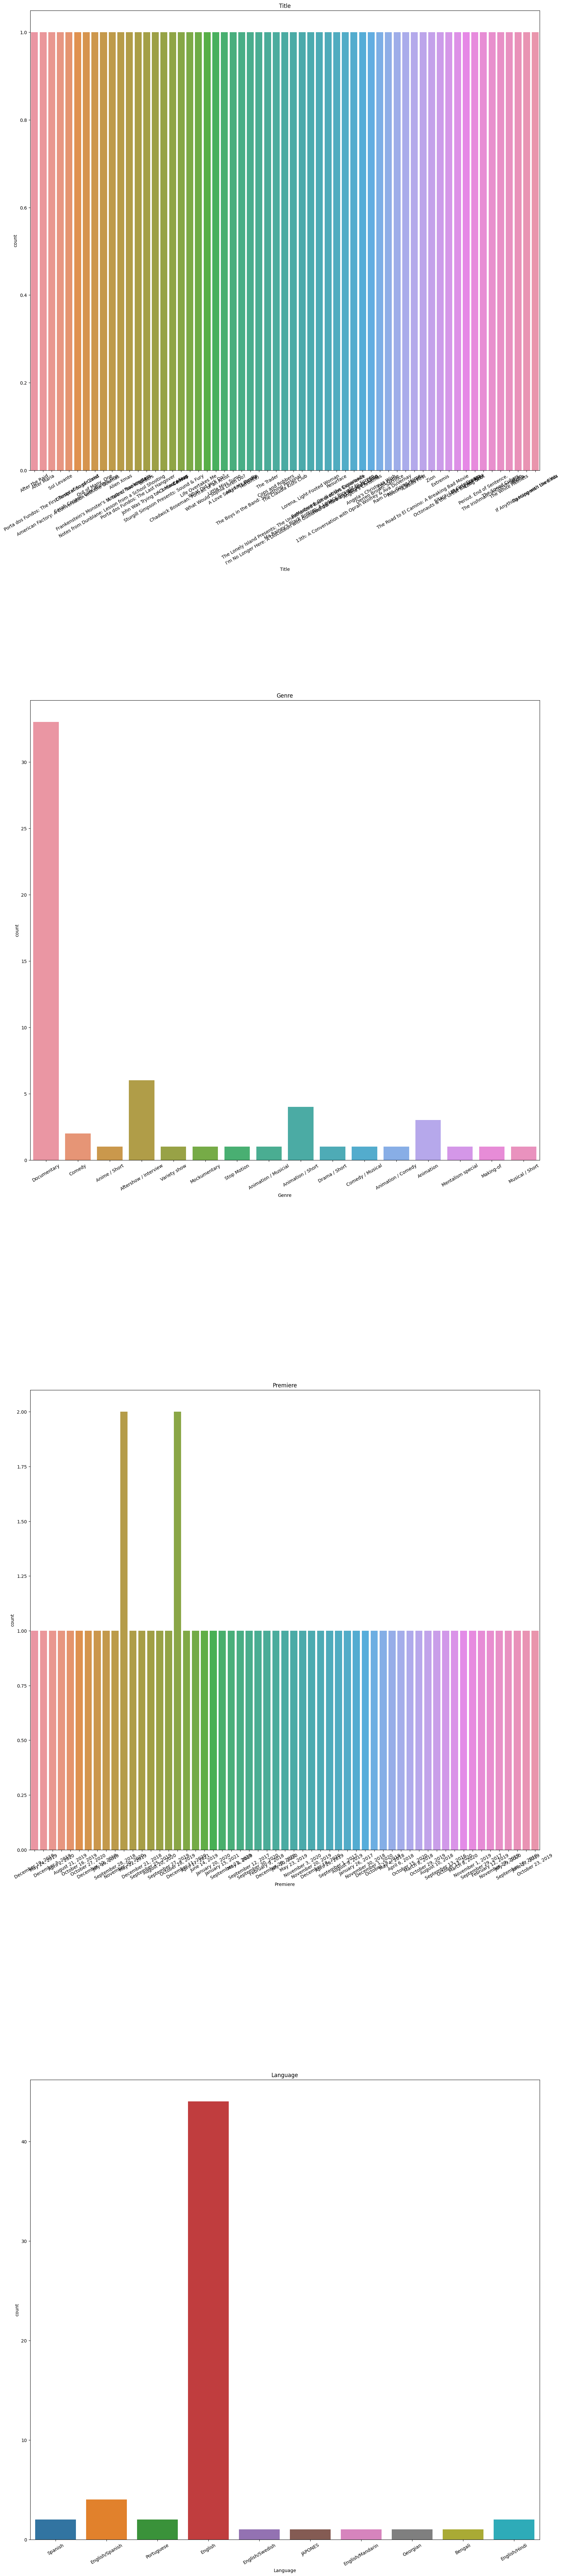

In [7]:
cols_cat = ["Title", "Genre", "Premiere", "Language"]

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(20,100))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Ahora eliminares la columna que no nos sirven los datos por ejemplo premiere debido a que siento que los datos de premiere no son tan importantes para saber la calificación de una pelicula.

In [8]:

data.drop(columns=['Premiere'],inplace=True)
data.columns


Index(['Title', 'Genre', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [9]:
data.describe()

,Runtime,IMDB Score
count,59.000000,59.000000
mean,29.847458,6.677966
std,12.470397,0.812630
min,4.000000,4.300000
25%,20.000000,6.400000
50%,30.000000,6.900000
75%,40.000000,7.150000
max,51.000000,8.300000


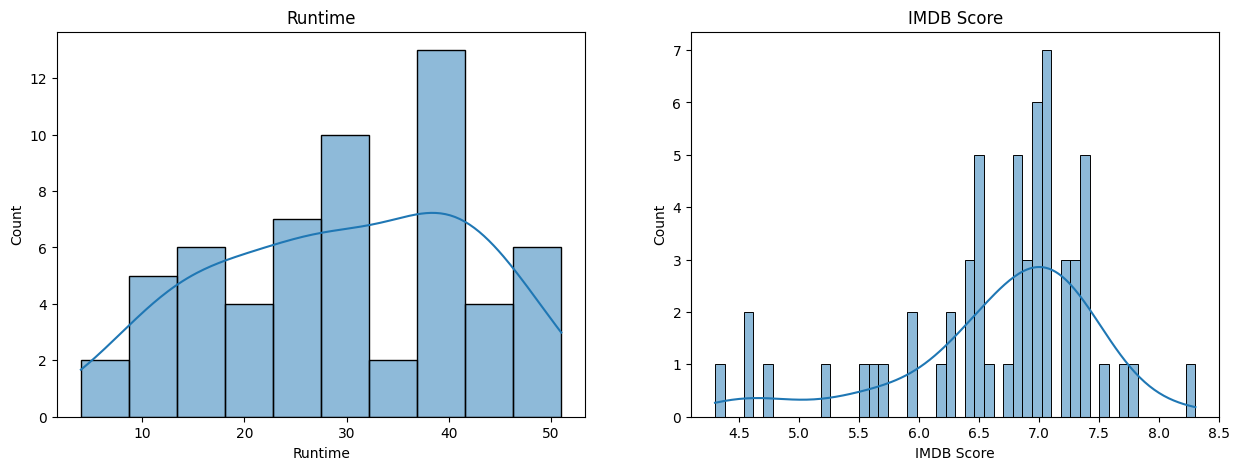

In [10]:
#Graficación

col_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Runtime':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [11]:
data['IMDB Score'].describe()

count    59.000000
mean      6.677966
std       0.812630
min       4.300000
25%       6.400000
50%       6.900000
75%       7.150000
max       8.300000
Name: IMDB Score, dtype: float64

El 75% de las empresas hay votado 7.15 de calificación de las peliculas.

In [12]:
data['Runtime'].describe()

count    59.000000
mean     29.847458
std      12.470397
min       4.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      51.000000
Name: Runtime, dtype: float64

El 75% de las peliculas duran 40 horas

In [13]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

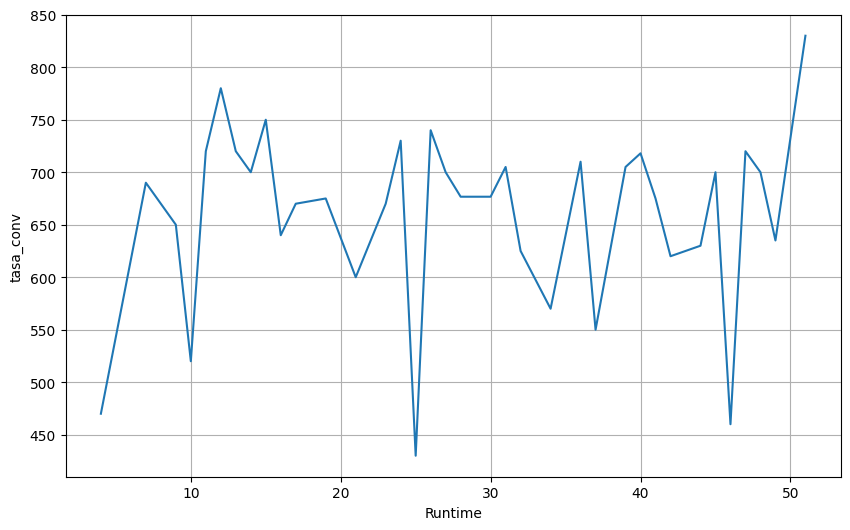

In [14]:
graficar_tasas_conversion('Runtime','IMDB Score')

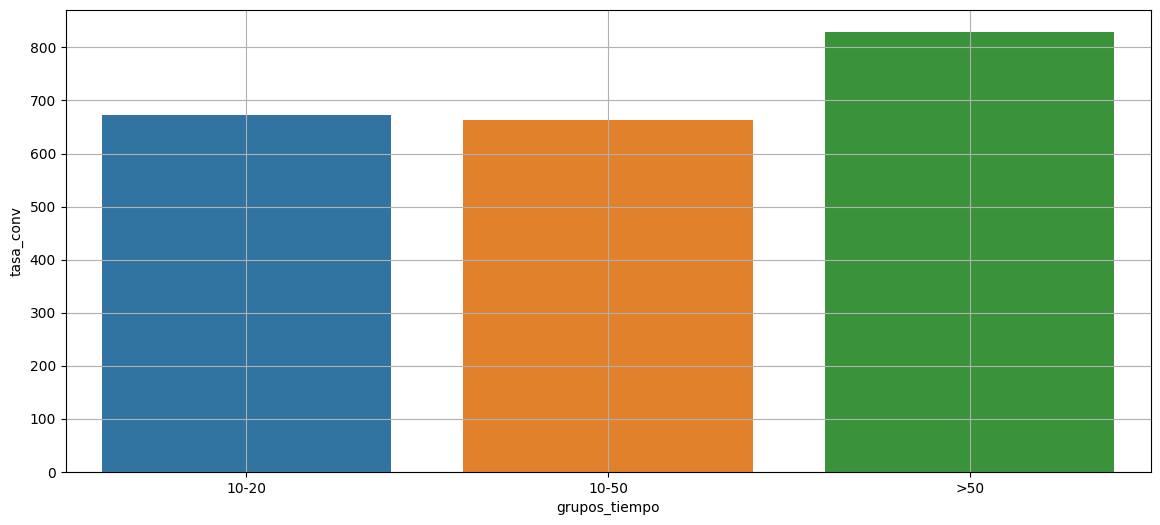

In [15]:
data.loc[:,'grupos_tiempo'] = "10-20"
data.loc[data['Runtime']>50,'grupos_tiempo'] = ">50"
data.loc[(data['Runtime']>20)&(data['Runtime']<=50), 'grupos_tiempo'] = "10-50"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_tiempo','IMDB Score',type='bar')

In [16]:
data.drop(columns=['Runtime'], inplace=True)

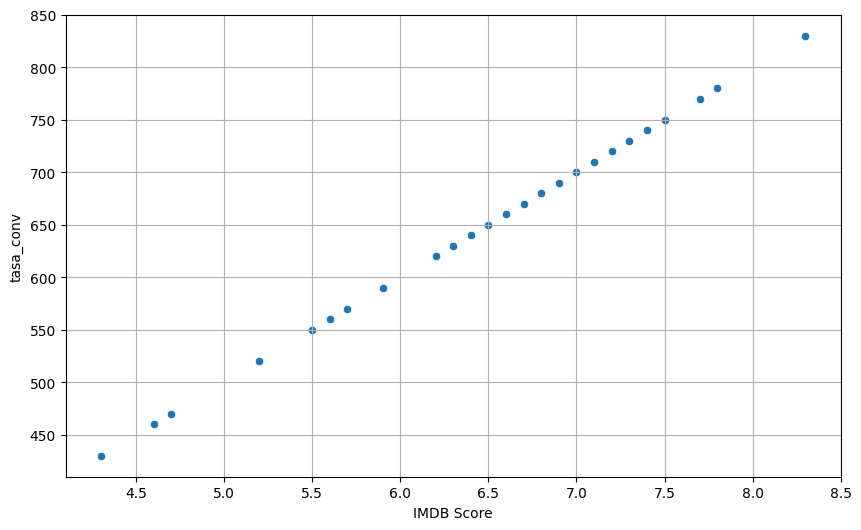

In [18]:
graficar_tasas_conversion('IMDB Score','IMDB Score',type='scatter')

Observando la grfica tenemos diferentes valores
- 0 a 4.5
- 4.6 a 5.5
- 5.6 a 6
- 6.1 a 7
- 7.1 a 7.7
- 7.8 a 8.4

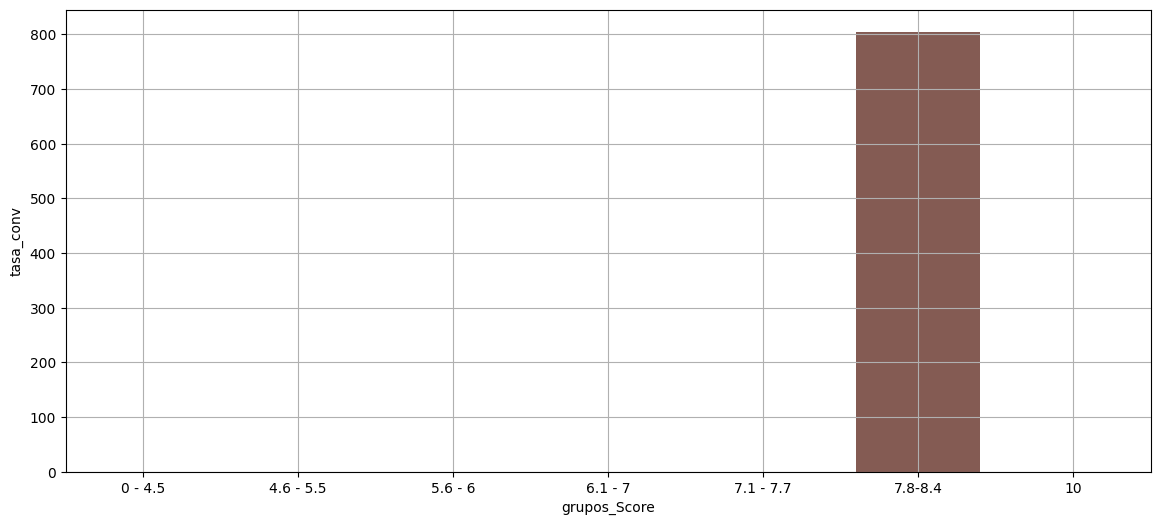

In [21]:
data.loc[:,'grupos_Score'] = "<0"
data.loc[(data['IMDB Score']>=0) & (data['IMDB Score']<4.5),'grupos_Score'] = "0-4.5"
data.loc[(data['IMDB Score']>=4.6) & (data['IMDB Score']<5.5),'grupos_Score'] = "4.6-5.5"
data.loc[(data['IMDB Score']>=5.6) & (data['IMDB Score']<6),'grupos_Score'] = "5.6-6"
data.loc[(data['IMDB Score']>=6.1) & (data['IMDB Score']<7),'grupos_Score'] = "6.1-7"
data.loc[(data['IMDB Score']>=7.1) & (data['IMDB Score']<7.7),'grupos_Score'] = "7.1-7.7"
data.loc[(data['IMDB Score']>=7.8) & (data['IMDB Score']<8.4),'grupos_Score'] = "7.8-8.4"
data.loc[data['IMDB Score']>=10,'grupos_Score'] = "10"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_Score','IMDB',type='bar')
orden = ['0 - 4.5', '4.6 - 5.5', '5.6 - 6', '6.1 - 7', '7.1 - 7.7', '7.8-8.4','10']
graficar_tasas_conversion('grupos_Score','IMDB Score',type='bar', order=orden)

Conclusión
- En el analisis exploratorio podremos observar que las peliculas que tiene una duración entre 30 y 50 horas son las que tiene una mayor puntuación de 7.8 a 8.4